In [1]:
import json
import os
from datetime import datetime
from math import exp

import matplotlib.pyplot as plt
import torch

In [2]:
checkpoint_dir = "output_pre_100k/pre_checkpoints"
info_dir = checkpoint_dir + "/info"
state_dir = checkpoint_dir + "/state"

In [3]:
files = [f for f in os.listdir(info_dir) if os.path.isfile(os.path.join(info_dir, f))]
print(len(files))

51


In [4]:
torch.load(os.path.join(info_dir, files[0]))

{'train_loss': tensor(2.4056),
 'val_loss': tensor(2.9394),
 'time': '2026-02-20T14:27:38.080959',
 'block_size': 1000,
 'batch_size': 32,
 'eval_interval': 2000,
 'step': 42000,
 'learning_rate': 0.000551446508741178,
 'text': 'Once upon a timeOnce upon a time, there was a little boy named Tim. Tim was very careless and did not like to stay at home. One day, he went for a walk in the forest. He saw a big flower and decided to decorate it. He used a stick to put flowers around the flower and hopped on it. It was a sunny day and Tim felt happy.\n\nAs the sun started to set, it started to get late. Tim sat down in front of the flowers',
 'metrics': '[{"gradient": {"total_norm": 0.6360566384491069, "max_grad": 0.04901621863245964}, "weight": {"max_weight": 6.033421039581299, "total_weight_norm": 309.87326987696395}, "system": {"cpu_percent": 3.1, "ram_gb": 2.047397888, "cuda": {"mem_allocated": 2.057586688, "mem_reserved": 16.775118848, "max_mem": 10.519580672}}, "current_loss": 2.4797110

In [5]:
steps = []

for p in files:
    state = torch.load(os.path.join(info_dir, p))
    steps.append((
        state["train_loss"].item(),
        state["val_loss"].item(),
        datetime.fromisoformat(state["time"]),
        state["block_size"],
        state["batch_size"],
        state["eval_interval"],
        state["step"],
        state["learning_rate"],
        state["metrics"],
        state["text"]
    ))

In [6]:
json.loads(steps[0][8])[0]

{'gradient': {'total_norm': 0.6360566384491069,
  'max_grad': 0.04901621863245964},
 'weight': {'max_weight': 6.033421039581299,
  'total_weight_norm': 309.87326987696395},
 'system': {'cpu_percent': 3.1,
  'ram_gb': 2.047397888,
  'cuda': {'mem_allocated': 2.057586688,
   'mem_reserved': 16.775118848,
   'max_mem': 10.519580672}},
 'current_loss': 2.4797110557556152}

In [7]:
steps = sorted(steps, key=lambda x: x[6])

In [8]:
step_count = len(steps)

x = list(range(step_count))

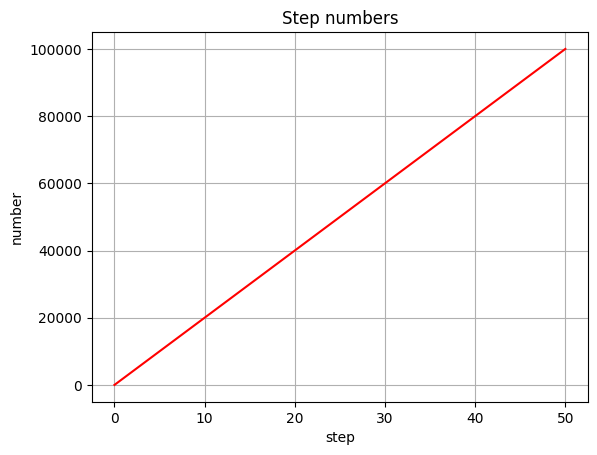

In [9]:
rate = [step[6] for step in steps]

plt.plot(x, rate, label="step number", color="red")
plt.xlabel('step')
plt.ylabel('number')
plt.title('Step numbers')
plt.grid(True)
plt.show()

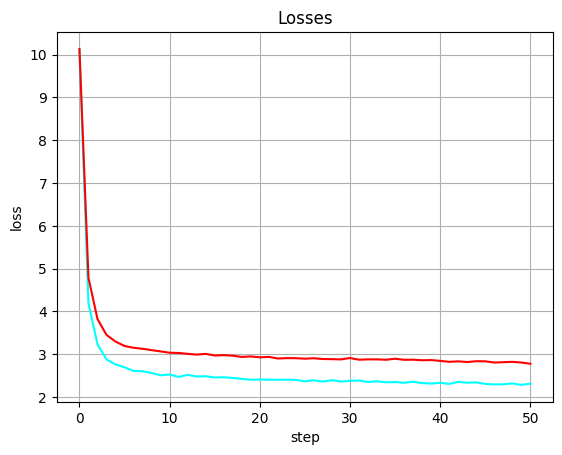

In [10]:
import matplotlib.pyplot as plt

step_count = len(steps)

x = list(range(step_count))

train_perplexity = [step[0] for step in steps]
rate = [step[1] for step in steps]

plt.plot(x, train_perplexity, label="train", color="cyan")
plt.plot(x, rate, label="test", color="red")
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Losses')
plt.grid(True)
plt.show()

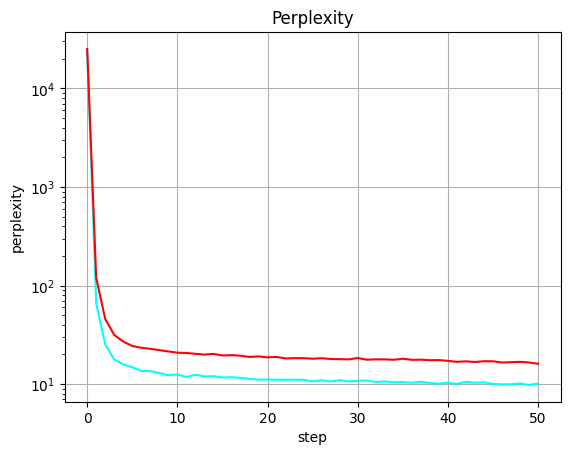

In [11]:
train_perplexity = [exp(step[0]) for step in steps]
test_perplexity = [exp(step[1]) for step in steps]

fig, ax = plt.subplots()
ax.plot(x, train_perplexity, label="train", color="cyan")
ax.plot(x, test_perplexity, label="test", color="red")
ax.set_yscale('log')
plt.xlabel('step')
plt.ylabel('perplexity')
plt.title('Perplexity')
plt.grid(True)
plt.show()

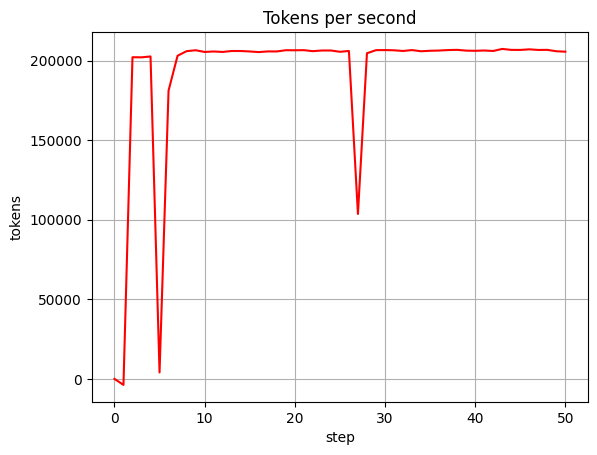

In [12]:
last_step_time: datetime | None = None
values = []

for step in steps:

    time = step[2]
    if last_step_time is None:
        last_step_time = time
        values.append(0.0)
        continue
    time_passed = time - last_step_time
    last_step_time = time

    block_size = step[3]
    batch_size = step[4]
    eval_interval = step[5]

    tokens = block_size * batch_size * eval_interval
    tokens_per_second = tokens / time_passed.total_seconds()

    values.append(tokens_per_second)

plt.plot(x, values, color="red")
plt.xlabel('step')
plt.ylabel('tokens')
plt.title('Tokens per second')
plt.grid(True)
plt.show()

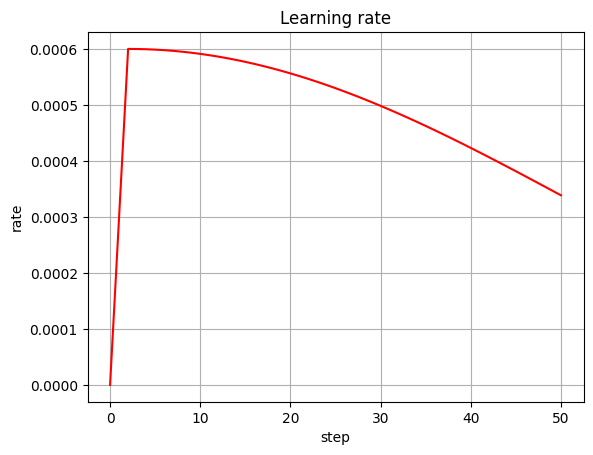

In [13]:
rate = [step[7] for step in steps]

plt.plot(x, rate, color="red")
plt.xlabel('step')
plt.ylabel('rate')
plt.title('Learning rate')
plt.grid(True)
plt.show()

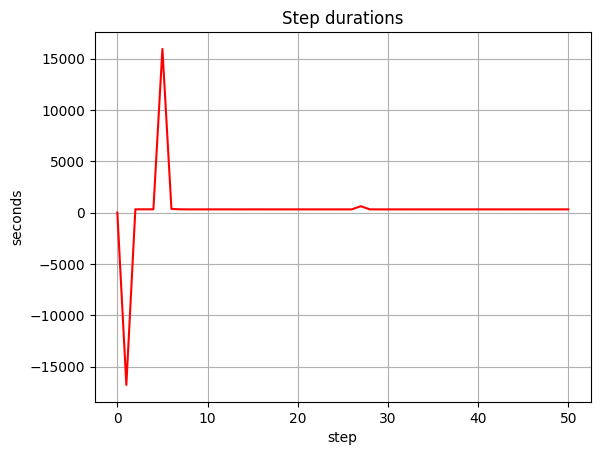

In [14]:
last_step_time: datetime | None = None

durations = []

for step in steps:
    time = step[2]
    if last_step_time is None:
        last_step_time = time
        durations.append(0.0)
        continue
    time_passed = time - last_step_time
    last_step_time = time
    durations.append(time_passed.total_seconds())

plt.plot(x, durations, color="red")
plt.xlabel('step')
plt.ylabel('seconds')
plt.title('Step durations')
plt.grid(True)
plt.show()

In [15]:
print(steps[-1][9])

Once upon a time, there was a little girl named Lily. She was very happy because it had something special. She saw a pretty bottle with a picture of a flower on it.

Lily asked her mommy, "What is the pretty bottle?" Her mommy said, "That is a pretty bottle with a picture of a flower on it. It has a picture of a butterfly and a little bug on it."

Lily thought for a moment and said, "I want to add some fun to how many


In [16]:
infos= [row for step in steps for row in json.loads(step[8])]
info_count= len(infos)
x = range(info_count)
info_count

963

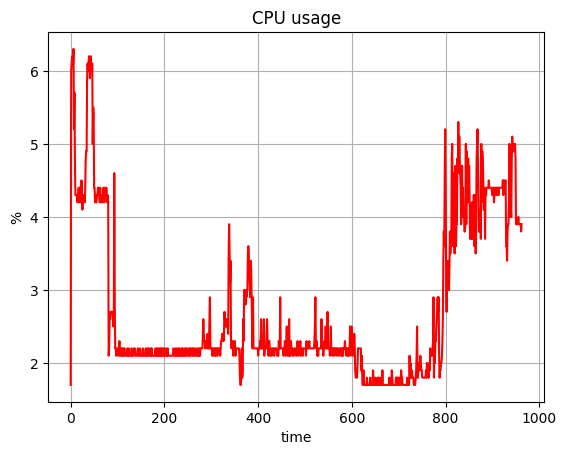

In [17]:
cpu = [info["system"]["cpu_percent"]
for info in infos]

plt.plot(x, cpu, color="red")
plt.xlabel('time')
plt.ylabel('%')
plt.title('CPU usage')
plt.grid(True)
plt.show()

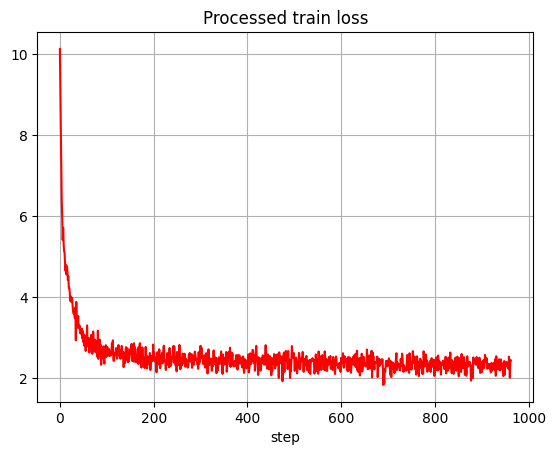

In [18]:
values = [info["current_loss"] for info in infos]

plt.plot(x, values, color="red")
plt.xlabel('step')
plt.title('Processed train loss')
plt.grid(True)
plt.show()

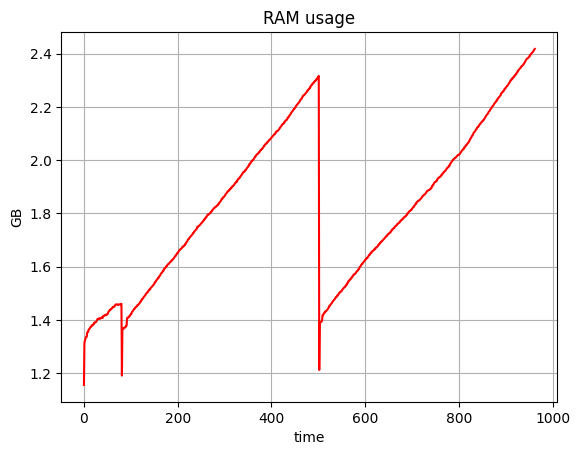

In [19]:
y = [info["system"]["ram_gb"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.ylabel('GB')
plt.title('RAM usage')
plt.grid(True)
plt.show()

{'gradient': {'total_norm': 2.4734470617293454,
  'max_grad': 0.38210582733154297},
 'weight': {'max_weight': 1.0, 'total_weight_norm': 35.26222167368344},
 'attention': {'entropy': nan},
 'system': {'cpu_percent': 56.3, 'ram_gb': 0.516829184}}

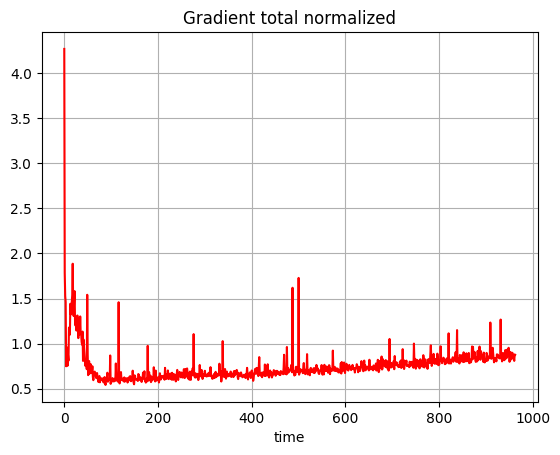

In [20]:
y = [info["gradient"]["total_norm"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Gradient total normalized')
plt.grid(True)
plt.show()

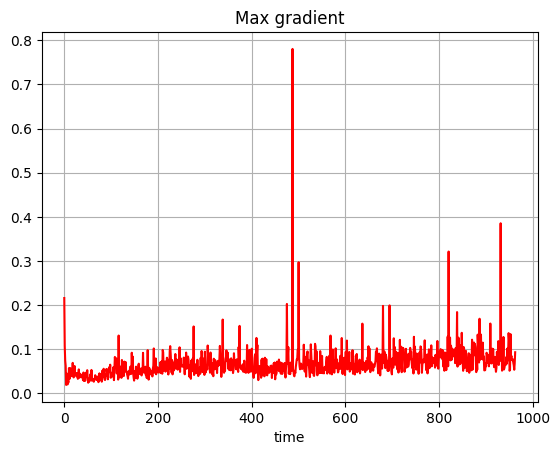

In [21]:
y = [info["gradient"]["max_grad"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Max gradient')
plt.grid(True)
plt.show()

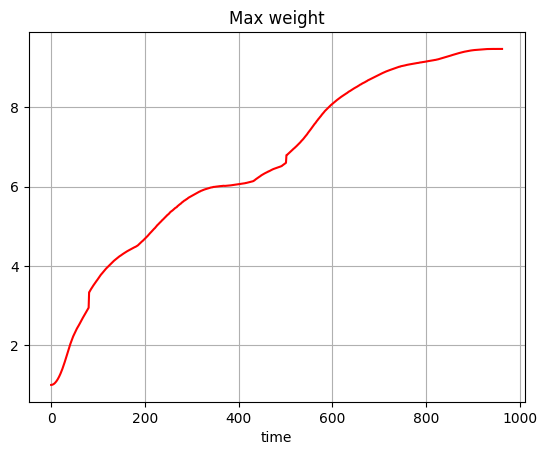

In [22]:
y = [info["weight"]["max_weight"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Max weight')
plt.grid(True)
plt.show()

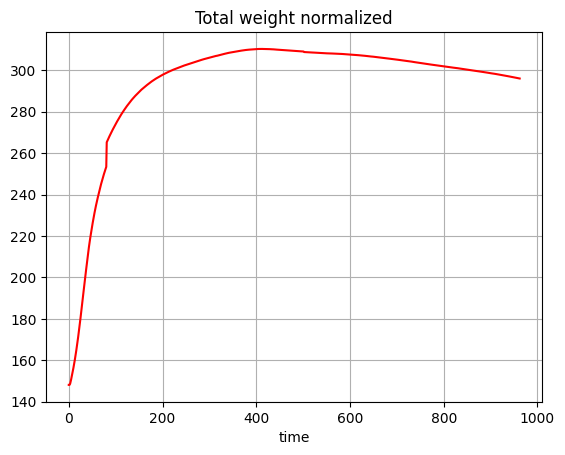

In [23]:
y = [info["weight"]["total_weight_norm"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Total weight normalized')
plt.grid(True)
plt.show()